In [92]:
# import libraries
import os
import json
import re
import sys
import csv
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as seab
# Plot the data using plotly offline mode
init_notebook_mode(connected=True)
print('headers loaded.. plotly plotting set..')

headers loaded.. plotly plotting set..


In [22]:
# Normalize function- to normalize values for review score and tip score//
def normalize(x, new_min = 0, new_max = 100):
    output = []
    old_min, old_max = min(x), max(x)

    for iter_val in x:
        val = (new_max - new_min) / (old_max - old_min) * (iter_val - old_min) + new_min
        output.append(val)

    return output

In [33]:
# Read reviews dataframe
reviews_df = pd.read_csv('reviews.csv')
reviews_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment_score_reviews
0,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ,0.9840
1,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,-0.9455
2,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw,-0.9203
3,YSUcHqlKMPHHJ_cTrqtNrA,0,2017-12-29 13:55:19,0,E6B-2U2sGG3xgmnNWZAEew,1,Came here on a Thursday night at 6:30 p.m. My ...,0,DbccYu3OppWKl21OanZnTg,0.9806
4,m7ommfJFalI47UksyX04Iw,1,2014-09-25 08:15:44,2,eed44nI0eZ4BGKtKXsRJhQ,1,Met a friend for dinner there tonight. The ser...,6,tAcB1ZohRtjozsymvqqHzQ,0.6124


In [6]:
# Read business (restaurants) dataframe
business_df = pd.read_csv('business.csv')
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
1,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
2,"1210 8th Street SW, Unit 220","{'BikeParking': 'False', 'ByAppointmentOnly': ...",fcXOEZdXYeZqnQ3lGlOXmg,"Local Services, Professional Services, Compute...",Calgary,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,51.041771,-114.081109,Nucleus Information Service,T2R 1L3,5,2.0,AB
3,1455 16th Avenue,"{'ByAppointmentOnly': 'False', 'BikeParking': ...",A98xW4qb7vOTguggHFs7Ng,"Fitness & Instruction, Active Life, Yoga",Richmond Hill,"{'Monday': '16:0-23:0', 'Tuesday': '16:0-23:0'...",1,43.861503,-79.388499,Hot Yoga Wellness,L4B 3G6,4,4.0,ON
4,"445 King Street W, Suite 101","{'AcceptsInsurance': 'True', 'ByAppointmentOnl...",zSpQmEBvRe3IhTUlMSA6HQ,"Trainers, Health & Medical, Active Life, Physi...",Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1,43.645041,-79.395799,Totum Life Science,M5V 1K4,23,4.0,ON


In [9]:
# Read tip dataframe
tip_df = pd.read_csv('tip.csv')
tip_df.head()

,business_id,compliment_count,date,text,user_id,sentiment_score_tips
0,0hudPyuCBlKg79OwKBw-eQ,0,2012-10-11 23:06:21,"Only worth a visit in the summer time, to take...",w8p4JW6-ERsbg8aB5wjEAg,0.6369
1,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33,Hands down best AYCE in town! Love it!,CaFbX7topxdLpBJ_SNDfGQ,0.8745
2,wZhB4U003eg2GQ-F7D2D4A,0,2016-08-12 22:18:07,When you receive the bag of seafood tie it up ...,oIHhfloe5VQamDFDB2dr1Q,0.9379
3,j9I2YkFCOKyAEb_3FbFqUA,0,2011-04-09 18:58:36,#poutinecrawl #yyc stop #1,JnHaPHkRO2_8V-DysmIBVw,-0.2960
4,XXGzCIcxzAZ6H98mxZbdqA,0,2010-04-26 15:34:54,Um. All kinds of awesome! Big clean and all t...,qvvpeBLkV4Shx0Teh87lPA,0.7959


In [16]:
# Read checkin dataframe
checkin_df = pd.read_csv('checkin.csv')
checkin_df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--DaPTJW3-tB1vP-PfdTEg,"2012-06-03 17:46:09, 2012-08-04 16:19:52, 2012..."
3,--Gc998IMjLn8yr-HTzGUg,2014-07-01 01:20:47
4,--SrzpvFLwP_YFwB_Cetow,"2011-02-10 03:51:06, 2011-02-28 20:35:49, 2011..."


In [20]:
# Read user dataframe
user_df = pd.read_csv('user.csv')
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.60,5,0,5,1,0,0,4,3,11,...,34,"2017,2018",9,"CfGCj80EdA-xS-mTWlAn4Q, JgD2Rk9K07MkZgG7Nb9YzA...",26,Peter,47,57,gvXtMj3XuPr0xHjgmlmtng,2014-01-05 20:45:54
1,3.45,64,0,64,16,0,8,42,10,32,...,974,"2015,2016,2017,2018",71,"tRC9YLo4LHquMVXZ9VO4Ag, -YpfTgz88rsPwsOvlfKn7w...",1007,Javier,470,1655,pU6GoRTcl1rIOi6zMynjog,2011-12-16 16:13:01
2,4.31,23,5,23,10,4,6,21,1,39,...,399,"2008,2009",13,"o8H8CioXzL4ZR_zxZYcv3Q, yJB1hHDIq18Qvmo3yo9_KA...",316,allison,391,708,_ICqwy7SW8J6OJBab1HkwA,2007-10-06 02:42:28
3,2.64,0,0,0,0,0,0,0,0,1,...,3,NaN,1,"5fvybUMH9N9Gx1zKw8UbBQ, I0HBD2I7uT_LU_gA9Gb9HA...",4,A,19,33,z5y4ejvC8uaUg5fGEJHbRA,2013-05-28 17:49:42
4,3.95,201,1,201,146,0,22,163,112,118,...,2158,"2014,2015,2016,2017,2018",58,"HHmX2L4Gg6L0WJNcxs4Ptw, 8DEyKVyplnOcSKx39vatbg...",1338,Fred,431,3157,rnU1EFMSnVJGrQxrnjaODg,2010-12-28 01:37:20


In [70]:
# Hotel rating distribution plot//

# Preparing data//
ratings_count = business_df.groupby(['stars']).size()
# print(ratings_count)

# Plot data//
trace0 = go.Bar(
        y = ratings_count.values,
        x = ratings_count.index,
        name = 'Number of restaurants',
        text = 'Count per star value',
        marker=dict(
            color='midnightblue',
        ),
        opacity=0.5
    )

# Layout for the plot
layout = dict(title = 'Distrubution of star rating (full dataset).',
              xaxis=go.layout.XAxis(title='Star rating',
                        showline=True,
                        mirror=True,
                        ticks='outside',
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of resturants',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )

# Add our data to the plot
data = [trace0]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-starsdistrib')


In [71]:
# Read updated restaurants dataframe//
business_df_new = pd.read_csv('business_featurized.csv')
business_df_new.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,review_posneg_score,attributes_kmeans
0,0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,0.003609,pricerange2 lunch dinner
1,1,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON,0.166667,pricerange2
2,2,"1210 8th Street SW, Unit 220","{'BikeParking': 'False', 'ByAppointmentOnly': ...",fcXOEZdXYeZqnQ3lGlOXmg,"Local Services, Professional Services, Compute...",Calgary,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,51.041771,-114.081109,Nucleus Information Service,T2R 1L3,5,2.0,AB,0.025000,pricerange1
3,5,"865 York Mills Road, Unit 1","{'RestaurantsDelivery': 'False', 'RestaurantsP...",C9oCPomVP0mtKa8z99E3gg,"Bakeries, Food",Toronto,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",1,43.754093,-79.349548,Bakery Gateau,M3B 1Y6,8,4.5,ON,0.625000,pricerange2
4,6,26 Bellair St,"{'RestaurantsPriceRange2': '3', 'BusinessParki...",C9keC4mWuXdl2mYFHZXudQ,"Fashion, Sporting Goods, Men's Clothing, Shopp...",Toronto,"{'Monday': '11:30-19:0', 'Tuesday': '11:30-19:...",1,43.670744,-79.391385,Uncle Otis Clothing,M5R 2C7,12,5.0,ON,0.500000,pricerange3


In [100]:
# Computes sentiment analysis distribtuion//

# Preparing data//
ratings_count = business_df_new.groupby(['review_posneg_score']).size()
# print(ratings_count)

# Plot data//
data = [go.Scatter(
    y = ratings_count.values,
    x = ratings_count.index,
    name = 'Number of restaurants per sentiment score',
    text = 'Number of restaurants',
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'maroon',
        line = dict(
            width = 1.5,
            color = 'red'
        )
    ),
    opacity = 0.7
)]

# Create/Design layout for the plot
layout = dict(title = 'Distribution of Sentiment Score (Positive Polarity of the review -how positive are the review comments truely?)',
              yaxis = dict(title='Number of restaurants',
                        showgrid=False,
                    ),
              xaxis = dict(title='Sentiment Score (positive polarity)',
                        showgrid=False,
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
             )

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='scatter-sentimentscore')

In [74]:
# Create plot data
positive_tip = []
negative_tip = []

sentiment_tip_list = list(tip_df['sentiment_score_tips']) #ignoring neutral views.
tip_pos_senti_perbusiness = tip_df[tip_df['sentiment_score_tips'] > 0.0].groupby(['business_id']).size()
tip_neg_senti_perbusiness = tip_df[tip_df['sentiment_score_tips'] < 0.0].groupby(['business_id']).size()

# review sentiment list
for i in sentiment_tip_list:
    if i < 0:
        negative_tip.append(i)
    else:
        positive_tip.append(i)
count_positive_tip = len(positive_tip)
count_negative_tip = len(negative_tip)
print(count_positive_tip, count_negative_tip)

# make a simple plot to see the distribution of review polarity.
trace0 = go.Bar(
    y=[count_positive_tip],
    x=[5],
    name='Overall Positive tip count',
    text = 'Number of positive reviews',
    marker=dict(
        color='orange',
    ),
    opacity=0.8
)

trace1 = go.Bar(
    y=[count_negative_tip],
    x=[105],
    name='Overall Negative tip count',
    text = 'Number of negative reviews',
    marker=dict(
        color='midnightblue',
    ),
    opacity=0.8
)

# Create/Design layout for the plot
layout = dict(title = 'Positive tip-review count vs Negative tip-review count',
              xaxis=go.layout.XAxis(showline=True,
                        mirror=True,
                        showticklabels = False,
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of user tips(tip-review)',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )


# Add our data to the plot
data = [trace0, trace1]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-posvsnegtips')

79921 15622


In [77]:
# compute review score//
positive_review = []
negative_review = []

review_count = list(business_df_new['review_count'])
sentiment_review_list = list(reviews_df['sentiment_score_reviews']) #ignoring neutral views.

# review sentiment list
for i in sentiment_review_list:
    if i < 0:
        negative_review.append(i)
    else:
        positive_review.append(i)
count_positive_review = len(positive_review)
count_negative_review = len(negative_review)
print(count_positive_review, count_negative_review)

# make a simple plot to see the distribution of review polarity.
trace1 = go.Bar(
    y=[count_positive_review],
    x=[5],
    name='Overall Positive reviews',
    text = 'Number of positive reviews',
    marker=dict(
        color='lightseagreen',
    ),
    opacity=0.8
)

trace2 = go.Bar(
    y=[count_negative_review],
    x=[105],
    name='Overall Negative reviews',
    text = 'Number of negative reviews',
    marker=dict(
        color='palevioletred',
    ),
    opacity=0.8
)

# Create/Design layout for the plot
layout = dict(title = 'Positive review count vs Negative review count',
              xaxis=go.layout.XAxis(showline=True,
                        mirror=True,
                        showticklabels = False,
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of user reviews',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )


# Add our data to the plot
data = [trace1, trace2]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-posvsnegreviews')

772658 109189


In [85]:
# Compute text length of text reviews and add that as a new column to reviews dataframe
reviews_df['text_length'] = reviews_df['text'].apply(len)
reviews_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment_score_reviews,text_length
0,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ,0.9840,1274
1,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,-0.9455,968
2,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw,-0.9203,845
3,YSUcHqlKMPHHJ_cTrqtNrA,0,2017-12-29 13:55:19,0,E6B-2U2sGG3xgmnNWZAEew,1,Came here on a Thursday night at 6:30 p.m. My ...,0,DbccYu3OppWKl21OanZnTg,0.9806,1070
4,m7ommfJFalI47UksyX04Iw,1,2014-09-25 08:15:44,2,eed44nI0eZ4BGKtKXsRJhQ,1,Met a friend for dinner there tonight. The ser...,6,tAcB1ZohRtjozsymvqqHzQ,0.6124,744


Text length of user reviews vs star rating plot.


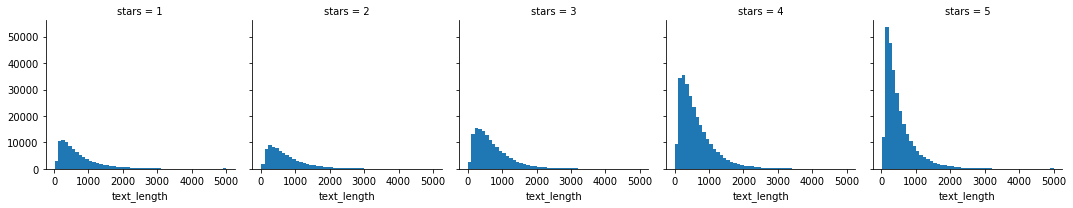

In [168]:
# Histogram using seaborn for textlength vs star rating//
textlen_vs_stars = seab.FacetGrid(data=reviews_df, col='stars')
print("Text length of user reviews vs star rating plot.")
textlen_vs_stars.map(plt.hist, 'text_length', bins=50)

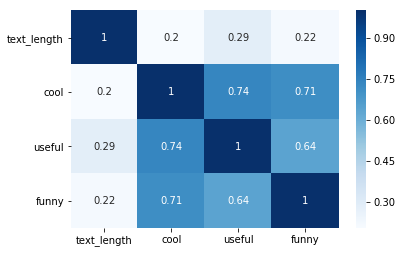

In [167]:
# heatmap showing the correlation between review text length, useful tag, cool tag and funny tag.
data = reviews_df[['text_length', 'cool', 'useful', 'funny']]
seab.heatmap(data.corr(), annot=True, cmap=plt.cm.Blues)

In [170]:
# Load original yelp business.json file to get not cleaned (pre-processed) restaurants dataframe.
dataset_business = pd.read_json('project data/yelp_dataset/business.json', lines=True)
print('Loaded business.json file..')
dataset_business.head()

Loaded business.json file..


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [172]:
# Preparing data//
restaurant_count_perstate = dataset_business.groupby(['state']).size()
# print(restaurant_count_perstate)

# Plot data//
trace0 = go.Bar(
        y = restaurant_count_perstate.values,
        x = restaurant_count_perstate.index,
        name = 'Number of restaurants',
        text = 'Count per star value',
        marker=dict(
            color='midnightblue',
        ),
        opacity=0.5
    )

# Layout for the plot
layout = dict(title = 'Distrubution of star rating (full dataset).',
              xaxis=go.layout.XAxis(title='State name',
                        showline=True,
                        mirror=True,
                        ticks='outside',
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of resturants',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )

# Add our data to the plot
data = [trace0]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-starsdistrib')

In [173]:
#Filter data for dataset for business aka restaurants based in canada alone.
provinces_canada = pd.read_csv('ca-cities-sample.csv')
provinces_canada.head()

province_code = provinces_canada.groupby(provinces_canada['province_code']).groups.keys()
print('Keys:', province_code)
province_list = list(province_code)
print('Province List:', province_list)

dataset_business = dataset_business[(dataset_business['state'].isin(province_list))]
length = len(dataset_business)
print(length)
dataset_business.head()

Keys: dict_keys(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT'])
Province List: ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']
50644


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
10,"1210 8th Street SW, Unit 220","{'BikeParking': 'False', 'ByAppointmentOnly': ...",fcXOEZdXYeZqnQ3lGlOXmg,"Local Services, Professional Services, Compute...",Calgary,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,51.041771,-114.081109,Nucleus Information Service,T2R 1L3,5,2.0,AB
15,1455 16th Avenue,"{'ByAppointmentOnly': 'False', 'BikeParking': ...",A98xW4qb7vOTguggHFs7Ng,"Fitness & Instruction, Active Life, Yoga",Richmond Hill,"{'Monday': '16:0-23:0', 'Tuesday': '16:0-23:0'...",1,43.861503,-79.388499,Hot Yoga Wellness,L4B 3G6,4,4.0,ON


In [174]:
# Number of restaurants per state in the dataset//

# Preparing data//
business_df = business_df[business_df['state'] != 'BC']
restaurant_count_perstate = business_df.groupby(['state']).size()
# print(restaurant_count_perstate)

trace0 = go.Bar(
        y = restaurant_count_perstate.values,
        x = restaurant_count_perstate.index,
        name = 'Number of restaurants',
        text = 'Count of restaurants',
        marker=dict(
            color='lightgreen',
        ),
        opacity=0.7
    )

# Layout for the plot
layout = dict(title = 'Distrubution of restaurants(with respect to state).',
              xaxis=go.layout.XAxis(showline=True,
                        mirror=True,
                        title='State',            
                        ticks='outside',
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of resturants',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )

# Add our data to the plot
data = [trace0]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-starsdistrib')

In [137]:
# Preparing data//
restaurant_highranking_perstate = business_df[business_df['stars'] >= 4].groupby(['state']).size()
restaurant_lowranking_perstate = business_df[business_df['stars'] <= 2].groupby(['state']).size()

#plot data//
trace1 = go.Bar(
    x=restaurant_highranking_perstate.index,
    y=restaurant_highranking_perstate.values,
    name='Number of highly rated restaurants per state',
    text = 'Restaurants count',
        marker=dict(
            color='palevioletred',
        ),
        opacity=0.7
)
trace2 = go.Bar(
    x=restaurant_lowranking_perstate.index,
    y=restaurant_lowranking_perstate.values,
    name='Number of poorly rated restaurants per state',
    text = 'Restaurants count',
        marker=dict(
            color='lightseagreen',
        ),
        opacity=0.7
)

# Layout for the plot
layout = dict(title = 'Number Highly rated restaurants vs low rated restaurants per state',
              barmode='stack',
              xaxis=go.layout.XAxis(title='State',
                        showline=True,
                        mirror=True,
                        ticks='outside',
                        linecolor='#636363',
                        linewidth=6
                    ),
              yaxis = dict(title = 'Number of resturants',
                        zeroline=True,
                        showline=True,
                        mirror=True,
                        linecolor='#636363',
                        linewidth=6
                    ),
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )

# Add our data to the plot
data = [trace1, trace2]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='bar-plot-starsdistrib')

In [175]:
# Preparing data to plot
restaurant_isopen = business_df.groupby(['is_open']).size()
print(restaurant_isopen)
values = restaurant_isopen.values
labels = ['Is open: False/0', 'Is open: True/1']

# Plot data//
trace = go.Pie(labels=labels, 
            values=values,
            name='Number of Open vs Closed Restaurants overall',
            marker={'colors': ['grey', 'salmon'],
            'line': {'color': 'white', 'width': 1}}
        )

# Layout for the plot
layout = dict(title = 'Number of Open vs Closed Restaurants',
              showlegend=True,
              legend=dict(bgcolor='lightgray',
                        bordercolor='gray',
                        borderwidth=2
                    )
              )

# Add data to plot//
data = [trace]

# Combine data and layout into a single figure
fig = dict(data=data, layout=layout)

# IPython notebook- plot
iplot(fig, filename='basic_pie_chart')


is_open
0     5781
1    25871
dtype: int64
